In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv(r"D:\Data Science and AI\PYTHON\Prodigy Infotech\Prodigy task 4\twitter_training.csv")
v_data = pd.read_csv(r"D:\Data Science and AI\PYTHON\Prodigy Infotech\Prodigy task 4\twitter_validation.csv")

data.columns = ['id', 'entity', 'sentiment', 'tweet']
v_data.columns = ['id', 'entity', 'sentiment', 'tweet']

In [4]:
data.head(3)

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [5]:
v_data.head(3)

,id,entity,sentiment,tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."


In [6]:
data.shape

(74681, 4)

In [7]:
data.columns

Index(['id', 'entity', 'sentiment', 'tweet'], dtype='object')

In [8]:
data.describe(include='all')

,id,entity,sentiment,tweet
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,Microsoft,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [9]:
id_types = data['id'].value_counts()
id_types

id
9200    6
9199    6
2402    6
2403    6
2404    6
       ..
2418    6
2417    6
2416    6
2415    6
2401    5
Name: count, Length: 12447, dtype: int64

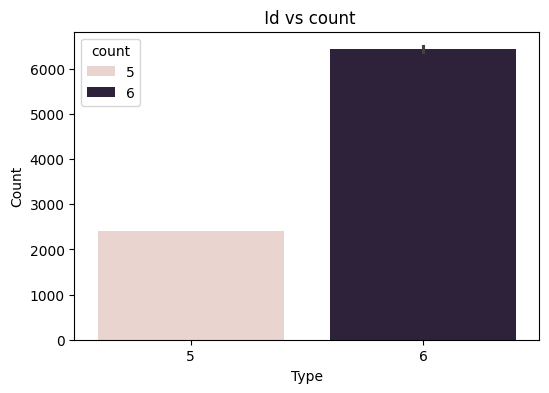

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(y= id_types.index,x = id_types.values,hue = id_types)
plt.title(" Id vs count")
plt.xlabel("Type")
plt.ylabel("Count")

plt.show()

In [11]:
entity_type = data['entity'].value_counts()
entity_type

entity
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)        

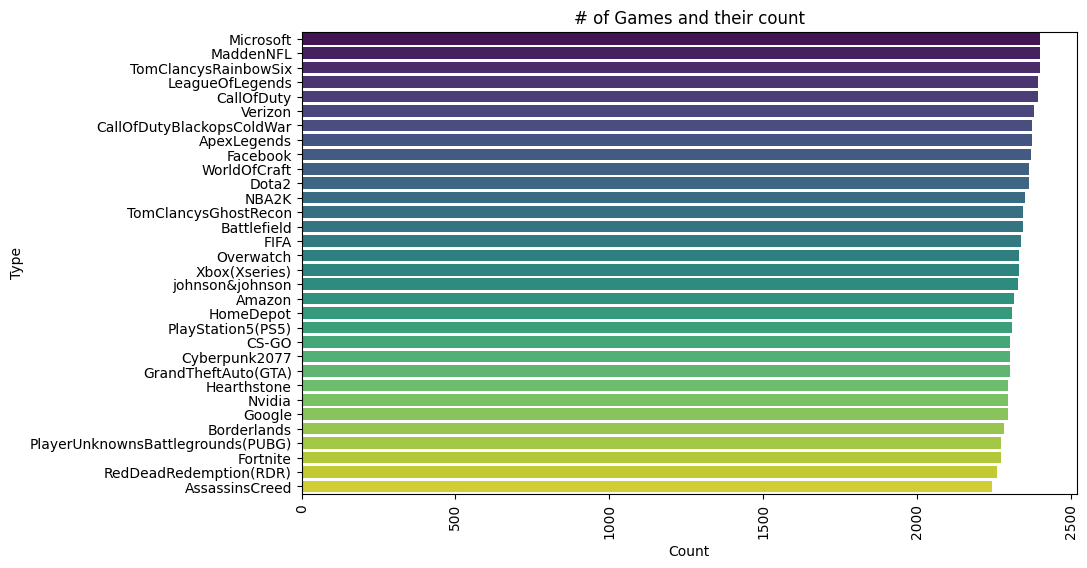

In [12]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=entity_type.values, y=entity_type.index, palette="viridis")  # Adjusted to have count on x-axis and entity type on y-axis
plt.title('# of Games and their count')
plt.xlabel('Count')  # Count on the x-axis
plt.ylabel('Type')   # Type on the y-axis
plt.xticks(rotation=90)
plt.show()


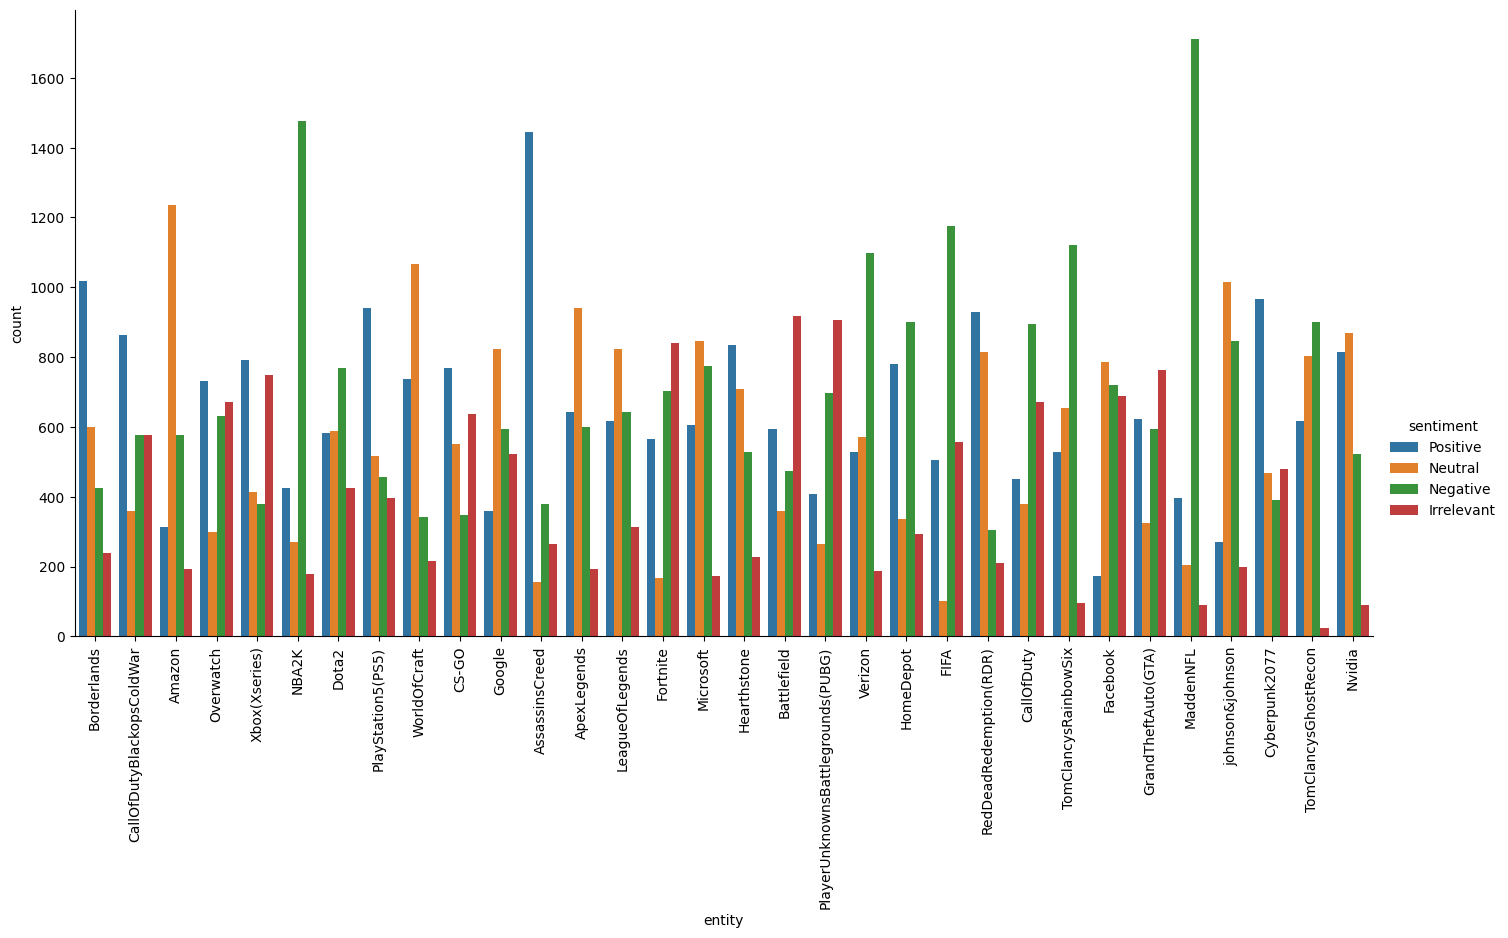

In [13]:
sns.catplot(x='entity',hue='sentiment',kind='count',height=7,aspect=2,data=data)
plt.xticks(rotation=90)
plt.show()

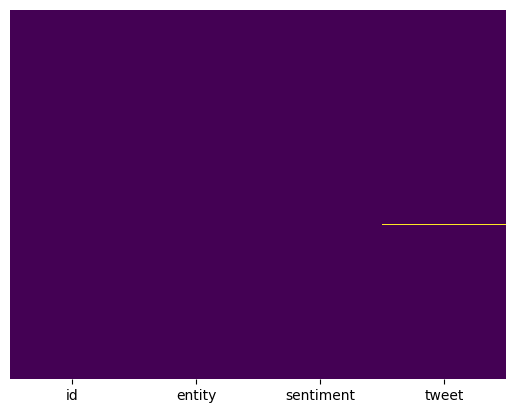

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74681


,Total Missing,In Percent
tweet,686,0.92
id,0,0.00
entity,0,0.00
sentiment,0,0.00


In [16]:
data.dropna(subset=['tweet'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
entity,0,0.0
sentiment,0,0.0
tweet,0,0.0


In [17]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [18]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [19]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data.head()

,id,entity,sentiment,tweet
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...


In [20]:
id_types = data['id'].value_counts()
id_types

id
9197    6
2405    6
2407    6
2410    6
2417    6
       ..
433     3
4432    3
4354    3
7761    3
7861    3
Name: count, Length: 12447, dtype: int64

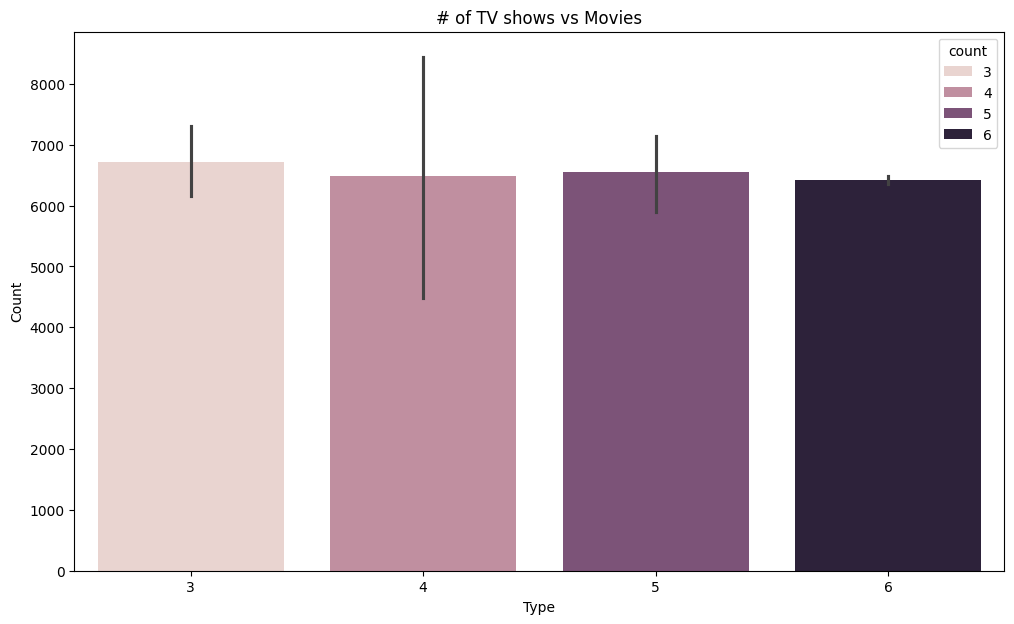

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index, hue = id_types)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

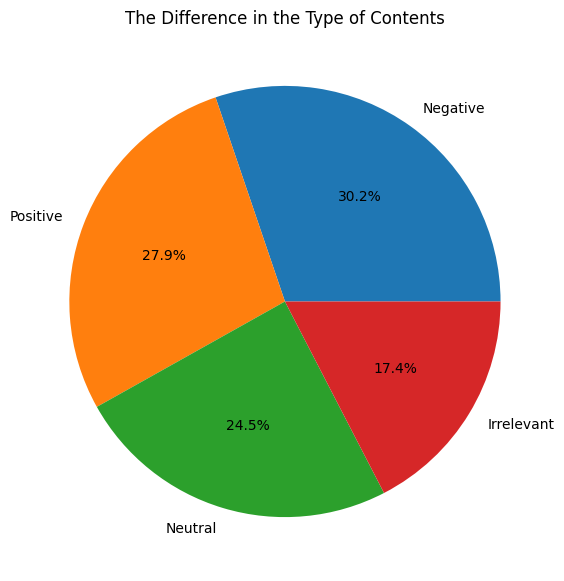

In [22]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%')
plt.title('The Difference in the Type of Contents')
plt.show()

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [24]:
data['sentiment']=le.fit_transform(data['sentiment'])
data['entity']=le.fit_transform(data['entity'])
v_data['sentiment']=le.fit_transform(v_data['sentiment'])
v_data['entity']=le.fit_transform(v_data['entity'])

In [25]:
data.head()

,id,entity,sentiment,tweet
23,2405,4,1,the biggest dissappoinment in my life came out...
24,2405,4,1,The biggest disappointment of my life came a y...
25,2405,4,1,The biggest disappointment of my life came a y...
26,2405,4,1,the biggest dissappoinment in my life coming o...
27,2405,4,1,For the biggest male dissappoinment in my life...


In [26]:
v_data.head()

,id,entity,sentiment,tweet
0,352,0,2,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,19,1,@Microsoft Why do I pay for WORD when it funct...
2,4371,5,1,"CSGO matchmaking is so full of closet hacking,..."
3,4433,13,2,Now the President is slapping Americans in the...
4,6273,10,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
